In [5]:
import numpy as np
import numpy as np
import pylab
import copy
from qiskit import BasicAer, Aer
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.chemistry.components.initial_states import HartreeFock
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian, QubitMappingType
from qiskit import IBMQ
import matplotlib.pyplot as plt

class MoleculeSimulation:
    def __init__(self, molecule, distances, two_qubit_reduction=False, freeze_core=False, orbital_reduction=None):
        self.molecule = molecule
        self.distances = distances
        self.two_qubit_reduction = two_qubit_reduction
        self.freeze_core = freeze_core
        self.orbital_reduction = orbital_reduction
        self.vqe_energies = []
        self.hf_energies = []
        
    def run(self, instance, verbose=False):
        for i, d in enumerate(self.distances):
            print("Simulation step", i, "simulating molecule: ", self.molecule.format(d))
            if verbose:
                print("PySCFDriver")
            driver = PySCFDriver(self.molecule.format(d), basis="sto3g")
            if verbose:
                print("driver.run")
            qmolecule = driver.run()
            if verbose:
                print("Hamiltonian")
            operator = Hamiltonian(qubit_mapping=QubitMappingType.PARITY, 
                                   two_qubit_reduction=self.two_qubit_reduction, 
                                   freeze_core=self.freeze_core, 
                                   orbital_reduction=self.orbital_reduction)
            if verbose:
                print("Hamiltonian.run")
            qubit_op, aux_ops = operator.run(qmolecule)
            if verbose:
                print("SLSQP")
            optimizer = SLSQP(maxiter=100)
            
            if verbose:
                print("HartreeFock")
            initial_state = HartreeFock(operator.molecule_info["num_orbitals"], 
                                        operator.molecule_info["num_particles"], 
                                        "parity", 
                                        two_qubit_reduction=self.two_qubit_reduction)
            if verbose:
                print("UCCSD")
            var_form = UCCSD(num_orbitals=operator.molecule_info["num_orbitals"], 
                             num_particles=operator.molecule_info["num_particles"], 
                             initial_state=initial_state, 
                             qubit_mapping="parity", 
                             two_qubit_reduction=self.two_qubit_reduction)
            if verbose:
                print("VQE")
            algo = VQE(qubit_op, var_form, optimizer, aux_operators=aux_ops)
            if verbose:
                print("VQE.run")
            vqe_result = algo.run(instance)
            if verbose:
                print("Hamiltonian.process_algorithm_result")
            vqe_result_processed = operator.process_algorithm_result(vqe_result)

            self.vqe_energies.append(vqe_result_processed.energy)
            self.hf_energies.append(vqe_result_processed.hartree_fock_energy)
    def plot(self):
        plt.plot(self.distances, self.vqe_energies, label="VQE Energy")
        plt.plot(self.distances, self.hf_energies, label="Hartree Fock Energy")
        plt.xlabel('Atomic distance (Angstrom)')
        plt.ylabel('Energy')
        plt.legend()
        plt.show()

In [7]:
molecule = "H .0 .0 .0; Li .0 .0 {0}"
distances = np.arange(0.5, 4.5, 0.5)

mc = MoleculeSimulation(molecule, distances, two_qubit_reduction=True, freeze_core=True, orbital_reduction=[-3, -2])
mc.run(QuantumInstance(BasicAer.get_backend("statevector_simulator")), verbose=True)

Simulation step 0 simulating molecule:  H .0 .0 .0; Li .0 .0 0.5
PySCFDriver
driver.run
Hamiltonian
Hamiltonian.run


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The Hamiltonian class is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used.
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:91: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


SLSQP
HartreeFock
UCCSD
VQE
VQE.run
Hamiltonian.process_algorithm_result
Simulation step 1 simulating molecule:  H .0 .0 .0; Li .0 .0 1.0
PySCFDriver
driver.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()


Hamiltonian
Hamiltonian.run


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The Hamiltonian class is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used.
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:91: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


SLSQP
HartreeFock
UCCSD
VQE
VQE.run
Hamiltonian.process_algorithm_result
Simulation step 2 simulating molecule:  H .0 .0 .0; Li .0 .0 1.5
PySCFDriver
driver.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()


Hamiltonian
Hamiltonian.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:91: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


SLSQP
HartreeFock
UCCSD
VQE
VQE.run
Hamiltonian.process_algorithm_result
Simulation step 3 simulating molecule:  H .0 .0 .0; Li .0 .0 2.0
PySCFDriver
driver.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()


Hamiltonian
Hamiltonian.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:91: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


SLSQP
HartreeFock
UCCSD
VQE
VQE.run
Hamiltonian.process_algorithm_result
Simulation step 4 simulating molecule:  H .0 .0 .0; Li .0 .0 2.5
PySCFDriver
driver.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()


Hamiltonian
Hamiltonian.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:91: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


SLSQP
HartreeFock
UCCSD
VQE
VQE.run
Hamiltonian.process_algorithm_result
Simulation step 5 simulating molecule:  H .0 .0 .0; Li .0 .0 3.0
PySCFDriver
driver.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()


Hamiltonian
Hamiltonian.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:91: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


SLSQP
HartreeFock
UCCSD
VQE
VQE.run
Hamiltonian.process_algorithm_result
Simulation step 6 simulating molecule:  H .0 .0 .0; Li .0 .0 3.5
PySCFDriver
driver.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()


Hamiltonian
Hamiltonian.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:91: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


SLSQP
HartreeFock
UCCSD
VQE
VQE.run
Hamiltonian.process_algorithm_result
Simulation step 7 simulating molecule:  H .0 .0 .0; Li .0 .0 4.0
PySCFDriver
driver.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()


Hamiltonian
Hamiltonian.run


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:91: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


SLSQP
HartreeFock
UCCSD
VQE
VQE.run
Hamiltonian.process_algorithm_result


/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/opt/conda/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()


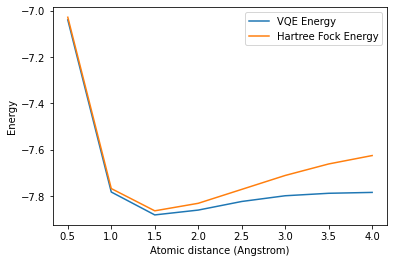

In [8]:
mc.plot()